<a href="https://colab.research.google.com/github/tejashri-110/NNDL-LAB/blob/main/Churn_bank(exp_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8390,8391,15755521,Ma,660,France,Female,48,0,90044.32,2,0,1,187604.97,1
5537,5538,15735346,Wallace,527,Germany,Female,41,10,136733.24,1,1,1,57589.29,0
4217,4218,15583840,Okechukwu,587,Germany,Male,35,5,121863.61,1,1,1,23481.69,1
6428,6429,15577423,Mosley,627,Germany,Female,39,5,124586.93,1,1,0,93132.61,1
1315,1316,15734634,Bocharova,607,Spain,Female,27,5,100912.19,1,0,0,7631.27,0


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [5]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7984,464,France,Male,46,6,161798.53,1,1,0,182944.47,0
7123,722,France,Female,38,3,0.00,2,0,1,167984.72,0
7722,684,Germany,Male,18,9,90544.00,1,0,1,4777.23,0
9164,680,Spain,Male,36,7,0.00,2,1,0,20109.21,0
4835,561,Spain,Male,34,4,85141.79,2,1,1,29217.37,0


In [6]:
df['Geography'].nunique()

3

In [7]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6673,729,France,1,36,8,109106.80,1,0,0,121311.12,0
5655,695,Spain,0,63,1,146202.93,1,1,1,126688.83,1
6652,827,France,0,38,5,0.00,2,0,0,103305.01,0
9890,662,Spain,0,37,4,155187.30,1,1,0,48930.80,0
590,713,Germany,1,38,7,144606.22,1,1,1,56594.36,1
447,501,France,0,40,4,125832.20,1,1,1,100433.83,0
862,725,France,0,41,7,113980.21,1,1,1,116704.25,0
1590,632,Spain,1,39,5,97854.37,2,1,0,93536.38,0
3155,641,Spain,0,32,7,0.00,2,1,1,24267.28,0
6960,673,France,0,39,7,82255.51,2,1,0,109545.56,0


In [10]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,0,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,0,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,1,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,1,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1


In [11]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [12]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
665,661,0,33,9,0.00,2,1,1,84174.81,0,1,0,0
9935,735,0,28,5,160454.15,2,0,1,114957.22,0,0,1,0
3807,470,0,30,3,101140.76,1,1,1,50906.65,0,1,0,0
4475,640,0,40,8,110340.68,1,1,1,157886.60,0,1,0,0
7067,746,1,24,4,0.00,1,0,1,94105.00,0,1,0,0
4633,477,0,48,8,129250.00,2,1,1,157937.35,0,0,1,0
9478,782,1,53,1,81571.05,1,1,0,182960.46,1,0,1,0
2622,627,0,27,0,185267.45,2,1,1,77027.34,0,0,1,0
993,661,1,28,7,95357.49,1,0,0,102297.15,0,0,0,1
5595,608,0,33,4,0.00,1,0,1,130474.03,0,1,0,0


In [13]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


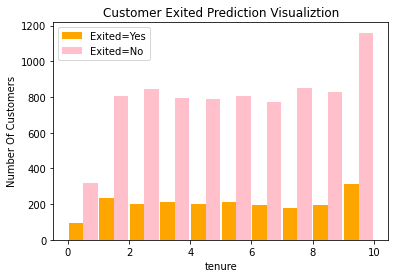

In [14]:
exited_no = df1[df1.Exited==0].Tenure
exited_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['orange','pink'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


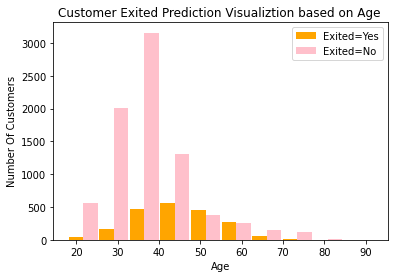

In [15]:
exited_no = df1[df1.Exited==0].Age
exited_yes = df1[df1.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['orange','pink'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


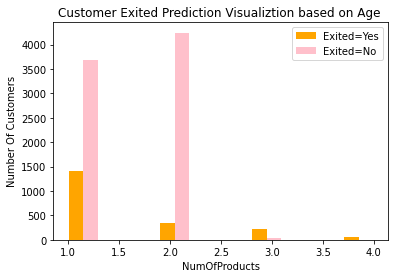

In [16]:
exited_no = df1[df1.Exited==0].NumOfProducts
exited_yes = df1[df1.Exited==1].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['orange','pink'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [17]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [18]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6925,0.618,0,0.148649,0.9,0.330479,0.000000,1,1,0.420650,0,0,1,0
6942,0.162,0,0.324324,0.8,0.481561,0.333333,1,0,0.630769,0,0,1,0
6889,0.246,1,0.094595,0.6,0.441081,0.333333,0,0,0.233757,0,1,0,0
8102,0.422,1,0.364865,0.2,0.669935,0.333333,0,1,0.578593,0,0,1,0
4976,0.956,1,0.094595,0.7,0.575341,0.000000,1,0,0.583064,0,0,1,0
9709,0.450,1,0.527027,0.8,0.549773,0.000000,1,1,0.422358,0,1,0,0
9853,0.738,0,0.256757,1.0,0.579449,0.000000,1,0,0.402023,0,0,0,1
8402,0.398,0,0.243243,0.6,0.555693,0.000000,0,0,0.419899,1,0,1,0
133,0.672,0,0.094595,0.1,0.000000,0.333333,0,1,0.082247,0,1,0,0
108,0.510,0,0.202703,0.5,0.598222,0.000000,0,0,0.359290,0,0,0,1


In [19]:
df1.shape

(10000, 13)

In [20]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [21]:
X_train.shape

(8000, 12)

In [22]:
X_test.shape

(2000, 12)

In [23]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.5202 - accuracy: 0.7830
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4664 - accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4490 - accuracy: 0.8044
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4378 - accuracy: 0.8124
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4300 - accuracy: 0.8148
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.8210
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4207 - accuracy: 0.8226
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8264
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8273
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4111 - accura

In [24]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8560


[0.3463709354400635, 0.8560000061988831]

In [25]:
yp = model.predict(X_test)
yp[:5]

array([[0.02982539],
       [0.06109238],
       [0.06496796],
       [0.08932421],
       [0.07528847]], dtype=float32)

In [26]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [28]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.48      0.57       405

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



Text(69.0, 0.5, 'Truth')

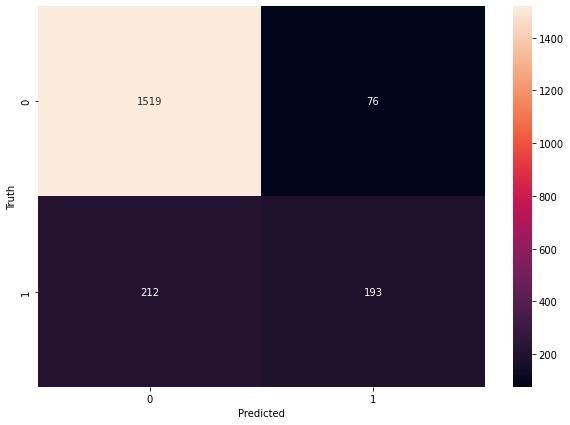

In [29]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
round((1520+192)/(1520+192+75+213),2)

0.86

Customers who did not churn:

In [31]:
round(1520/(1520+192),2)

0.89

Customers who actually churned:

In [32]:
round(192/(192+75),2)

0.72

In [33]:
round(1520/(1520+75),2)

0.95

In [34]:
round(192/(213+192),2)

0.47